In [69]:
import math
import glob, os
import matplotlib.pyplot as plt 
import numpy as np                                         
import matplotlib.tri as tri
from scipy import interpolate
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import cm
colors = cm.tab10([0,1,2,3,4,5,6,7,8])


def printframe(T,X,Y,Xi,Yi,lev):
    
    triang = tri.Triangulation(X,Y) 
    interpolator = tri.LinearTriInterpolator(triang, T)
    Ts = interpolator(Xi, Yi)
    
    fig=plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_ylabel('Position along Y [mm]')
    ax1.set_xlabel('Position along X [mm]')
    ax1.contour(xi, yi, Ts, levels=lev, linewidths=0.5, colors='k', antialiased=True)
    ax1.set_aspect('equal', adjustable='box')
    cntr1 = ax1.contourf(xi, yi, Ts, levels=lev, cmap="RdBu_r", extend='max', antialiased=True)
    CS = cntr1
    origin = 'lower'
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    CS2 = ax1.contour(CS, lev, origin=origin,alpha = 0)
    cbar = fig.colorbar(CS,cax=cax)
    cbar.ax.set_ylabel('Temperature [$^{\circ}$C]')
    ax1.set_aspect('equal', adjustable='box') 
    #ax1.set_xlim(4,6)
    #ax1.set_ylim(3.5,5.5)
    plt.tight_layout()

def sortfilenames(path):
    fin = 'snap.*.csv'
    fnames = sorted(glob.glob(os.path.join(path,fin)))
    stps = [nm.split(".") for nm in fnames]
    stps = [float(x[-2]) for x in stps]
    ind = np.argsort(stps)
    fnames = [fnames[x] for x in ind]
    return fnames

def readfilesTx(nm):
    
    T = []
    x = []
    y = []
    z = []
    mp = []
    
    with open(nm) as f:

        lines = [line.split(",") for line in f]
    
    header = lines[0]
    time = header[0]
    lines[0:1]=[]
    if len(lines) > 0:
        for line in lines:
            T.append(float(line[0]))
            mp.append(float(line[1]))
            x.append(float(line[2]))
            y.append(float(line[3]))
            z.append(float(line[4]))
    
    return T,mp,x,y,z,time


Set up the domain

In [123]:
xi = np.linspace(-2.5,12.5,200)
yi = np.linspace(-2.5,12.5,200)

Xi, Yi = np.meshgrid(xi, yi)

Read data

In [136]:
current_directory = os.getcwd()
path = current_directory + "/data/"

f = sortfilenames(path)
Tatdt = []
MPatdt = []
xatdt = []
yatdt = []
zatdt = []
time = []

for f_ in f:
  T,MP,x,y,z,t = (readfilesTx(f_))
  Tatdt.append(T)
  MPatdt.append(MP)
  xatdt.append(x)
  yatdt.append(y)
  zatdt.append(z)
  time.append(t) 

Plot data

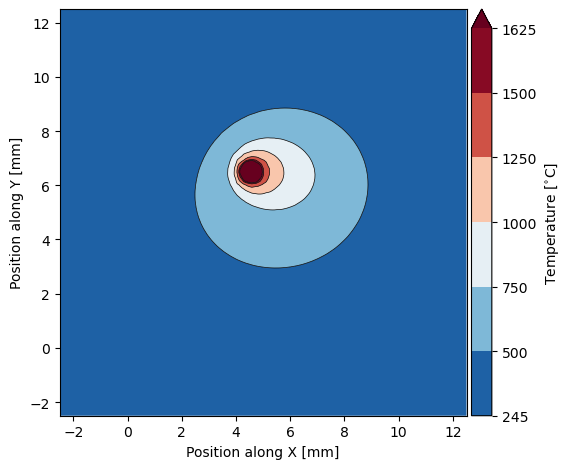

In [142]:
frame = 1200
x = xatdt[frame] 
y = yatdt[frame] 
Temp = Tatdt[frame] 
levels = [245,500,750,1000,1250,1500,1625]
printframe(Temp,x,y,Xi,Yi,levels)

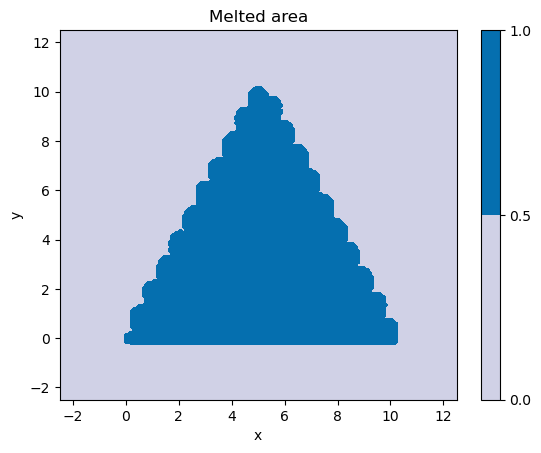

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define the grid
x_grid = xi  # Define the x-axis grid points
y_grid = yi
X, Y = np.meshgrid(x_grid, y_grid)  # Create a meshgrid of the x and y grid points

# Initialize an empty grid for cumulative values
cumulative_values = np.zeros_like(X)

for frame in range(1, len(MPatdt)-1):
    # Extract x, y, and value arrays from the data
    x = xatdt[frame]
    y = yatdt[frame]
    values = MPatdt[frame]

    if len(x) > 2:
        # Interpolate the data onto the grid
        grid_values = griddata((x, y), values, (X, Y), method='linear', fill_value=0)
    
        # Accumulate the maximum values
        cumulative_values = np.maximum(cumulative_values, grid_values)
    else:
        next

# Plot the cumulative grid values with filled contours
plt.contourf(X, Y, cumulative_values, levels=[0, 0.5, 1], cmap='PuBu')
plt.colorbar()  # Add a colorbar for reference
plt.xlabel('x')
plt.ylabel('y')
plt.title('Melted area')
plt.show()